In [27]:
import numpy as np
import cv2
import imageio
import matplotlib.pyplot as plt



In [28]:
def draw_bars(size, coords, angles, canvas_size=(800, 1280)):

    """
    Function to draw bars on a TIFF image.
    
    Parameters
    ----------
    filename : str
        Desired name for the TIFF file.
    bars : list of tuples
        Each tuple contains the size, coordinate, and angle of a bar: (size, (x, y), angle).
    canvas_size : tuple, optional
        Size of the canvas, by default (800, 1280).
    """

    img = np.zeros(canvas_size, dtype='uint8')
    color = (255, 255, 255)
    thickness = -1
    center_x, center_y = canvas_size[1] // 2, canvas_size[0] // 2

    for i, (x, y) in enumerate(coords):
        angle = angles[i]
        width, height = size

        rect_center = (center_x + x, center_y - y)
        rect_angle = angle - 90  # Subtracting 90 degrees to make 90 vertical

        box = ((rect_center[0], rect_center[1]), (width, height), rect_angle)
        box = cv2.boxPoints(box)
        box = np.int0(box)

        img = cv2.drawContours(img, [box], 0, color, thickness)

    return img


def save_tiff(filename, img):
    imageio.imwrite(f"{filename}.tiff", img)

    
def display_tiff(filename, canvas_size=(800, 1280)):

    """
    Function to display a TIFF image with the center point as (0, 0).

    Parameters
    ----------
    filename : str
        The name of the TIFF file.
    canvas_size : tuple, optional
        The size of the canvas, by default (800, 1280).
    """

    img = imageio.imread(f"{filename}.tiff")
    plt.figure(figsize=(canvas_size[1] / 100, canvas_size[0] / 100))
    
    # Set the center point as (0, 0)
    center_x, center_y = canvas_size[1] // 2, canvas_size[0] // 2
    plt.xticks(np.arange(0, canvas_size[1], step=100), np.arange(-center_x, center_x, step=100))
    plt.yticks(np.arange(0, canvas_size[0], step=100), np.arange(center_y, -center_y, step=-100))
    
    plt.imshow(img, cmap='gray')
    plt.show()


/var/folders/p3/mdh493ks43l04slykq6gwbx80000gn/T/ipykernel_14640/2667600373.py:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(f"{filename}.tiff")


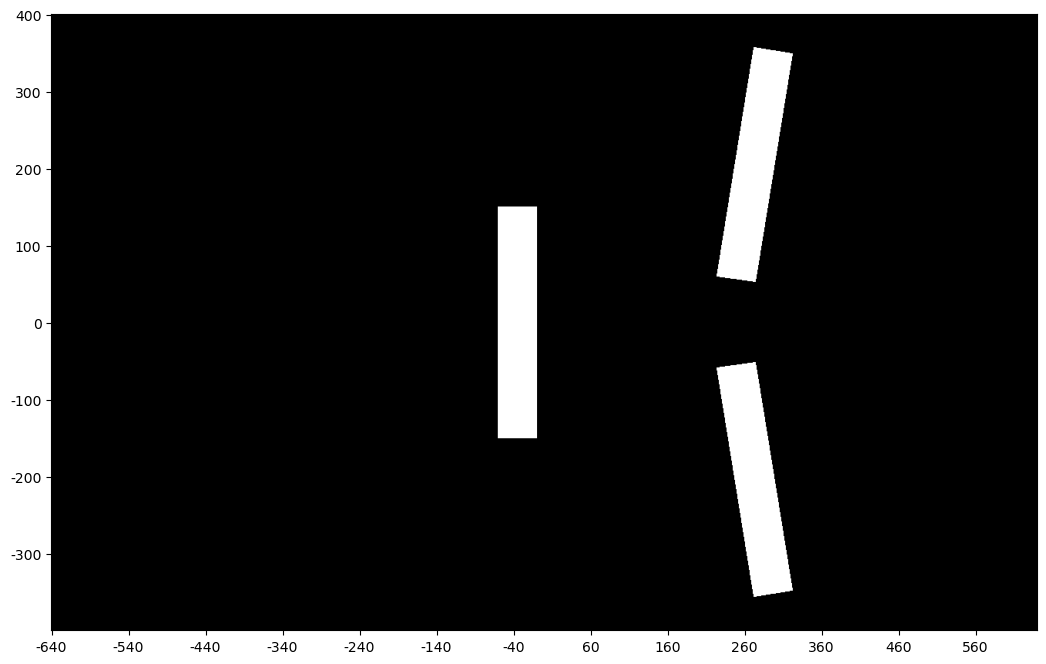

In [29]:
size = (50, 300)  # width, height
coords = [(-35, 0), (273.469, 204.082), (273.469, -204.082)]  # x, y coordinates of bars
angles = [90, 99.184, -99.184]  # angles of bars

img = draw_bars(size, coords, angles)
save_tiff("push_all", img)
display_tiff("push_all")


/var/folders/p3/mdh493ks43l04slykq6gwbx80000gn/T/ipykernel_14640/2667600373.py:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(f"{filename}.tiff")


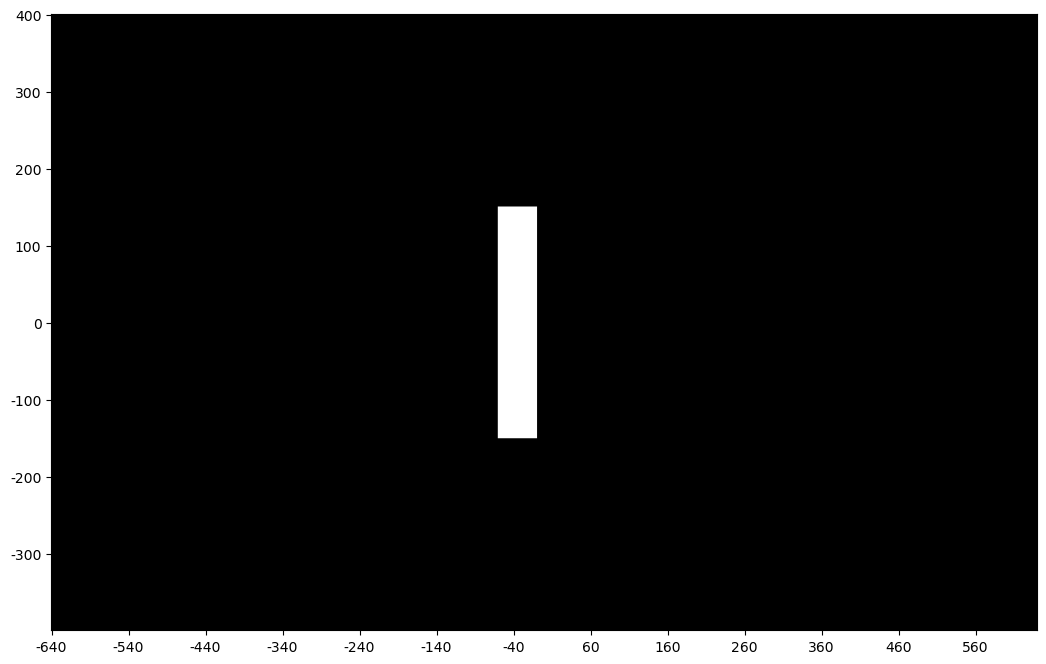

In [30]:
# only bar # 1
size = (50, 300)  # width, height
coords = [(-35, 0)]#, (273.469, 204.082), (273.469, -204.082)]  # x, y coordinates of bars
angles = [90]#, 99.184, -99.184]  # angles of bars

img = draw_bars(size, coords, angles)
save_tiff("push_all_only_1", img)
display_tiff("push_all_only_1")

/var/folders/p3/mdh493ks43l04slykq6gwbx80000gn/T/ipykernel_14640/2667600373.py:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(f"{filename}.tiff")


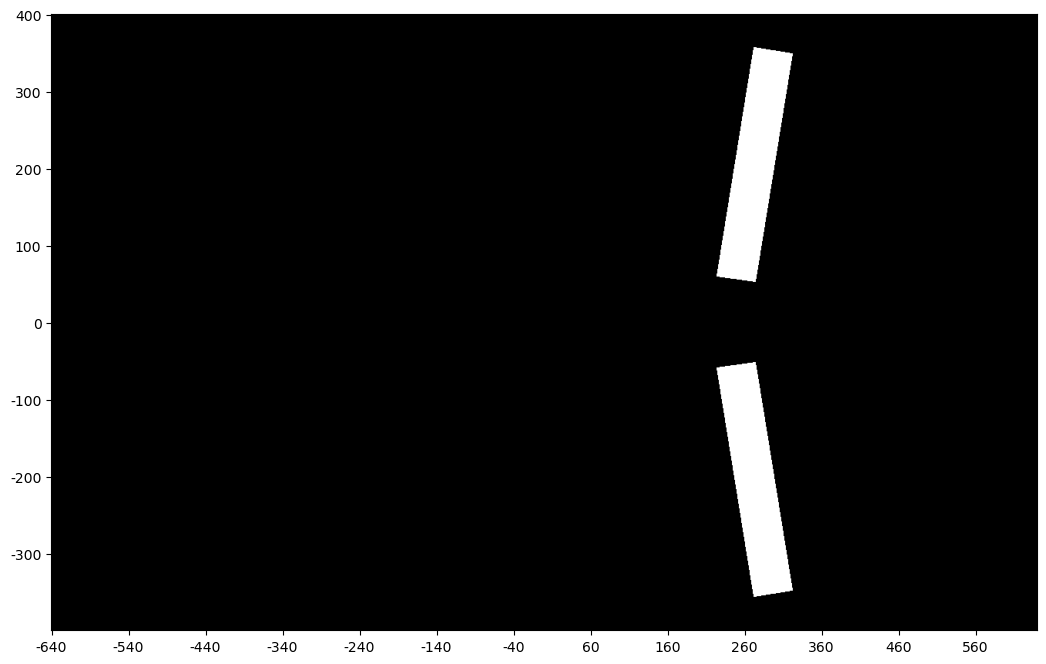

In [31]:
# only bar # 1
size = (50, 300)  # width, height
coords = [(273.469, 204.082), (273.469, -204.082)]  # x, y coordinates of bars
angles = [99.184, -99.184]  # angles of bars

img = draw_bars(size, coords, angles)
save_tiff("push_all_only_2_3", img)
display_tiff("push_all_only_2_3")